In [23]:
import pandas as pd
import numpy as np

In [40]:
df= pd.read_csv('../medical insurance/dataset/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [39]:
df.shape
df.describe()


,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


In [29]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [30]:
df.isnull().sum()


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [31]:
df.duplicated().sum()
df[df.duplicated()]



,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [32]:
df = df.drop_duplicates()
df.duplicated().sum()

np.int64(0)

In [33]:
df.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


In [36]:
df['charges'].describe()

count     1337.000000
mean     13279.121487
std      12110.359656
min       1121.873900
25%       4746.344000
50%       9386.161300
75%      16657.717450
max      63770.428010
Name: charges, dtype: float64

mean = 13279.12, median = 9386.16


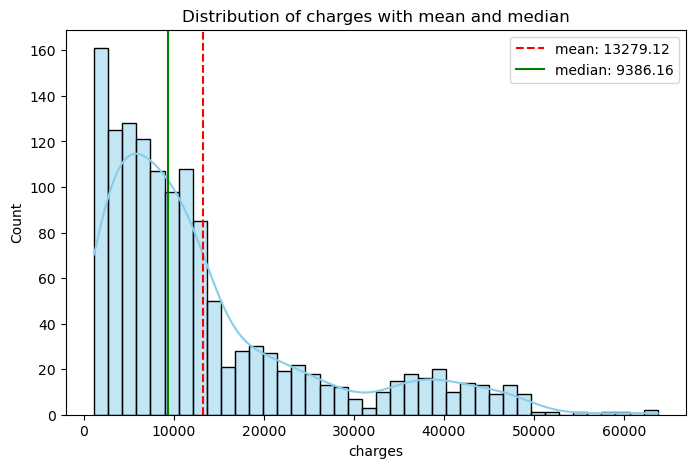

In [35]:
import seaborn as sns

# mean vs median for charges
import matplotlib.pyplot as plt

mean = df[col].mean()
median = df[col].median()
print(f"mean = {mean:.2f}, median = {median:.2f}")

plt.figure(figsize=(8,5))
sns.histplot(df[col], bins=40, kde=True, color='skyblue')
plt.axvline(mean, color='red', linestyle='--', label=f"mean: {mean:.2f}")
plt.axvline(median, color='green', linestyle='-', label=f"median: {median:.2f}")
plt.legend()
plt.title('Distribution of charges with mean and median')
plt.xlabel(col)
plt.show()

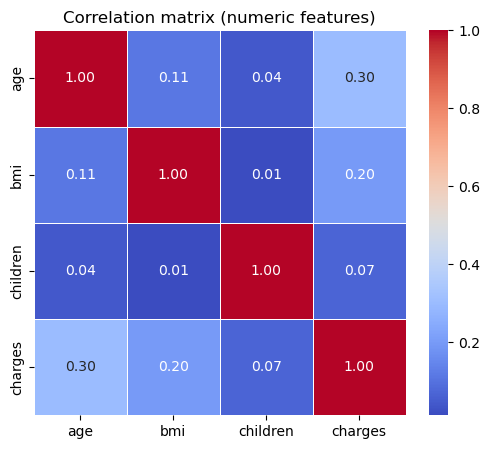

In [41]:
### Correlation heatmap

#Plot correlations for numeric features (encode categorical variables first if you want them included):

#```python
import seaborn as sns
import matplotlib.pyplot as plt

corr = df.select_dtypes(include=[np.number]).corr()
plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation matrix (numeric features)")
plt.show()
#```

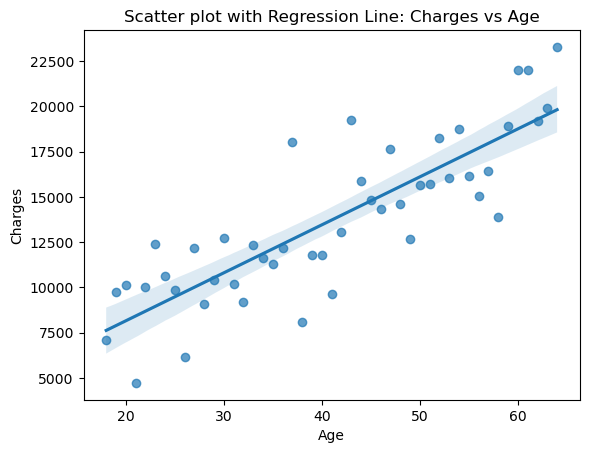

In [48]:
sns.regplot(x='age', y='charges', data=age_charges, scatter_kws={'alpha':0.7})
plt.title('Scatter plot with Regression Line: Charges vs Age')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()

Age is not only the factor of increasing charge but other factors are all there


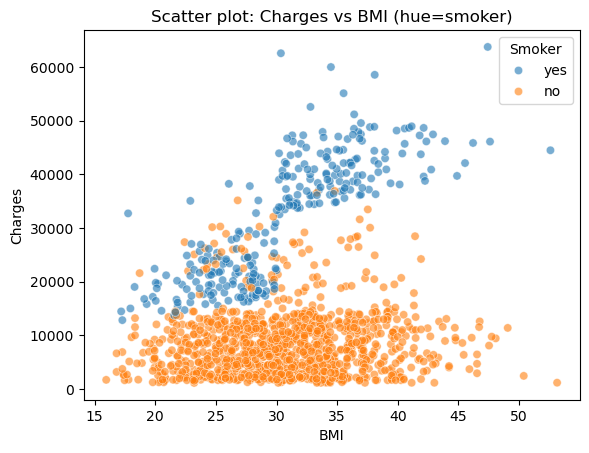

In [54]:

sns.scatterplot(x='bmi', y='charges', hue='smoker', data=df, alpha=0.6)
plt.title('Scatter plot: Charges vs BMI (hue=smoker)')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.legend(title='Smoker')
plt.show()


1) Age>30 + smoker has more charges
2) Good bmi and smoker has more charges relative to non smoker and bad bmi

In [59]:
avg_charges_by_smoker = df.groupby('smoker')['charges'].mean()
median_charges_by_smoker = df.groupby('smoker')['charges'].median()
print(avg_charges_by_smoker)
print(median_charges_by_smoker)

smoker
no      8434.268298
yes    32050.231832
Name: charges, dtype: float64
smoker
no      7345.40530
yes    34456.34845
Name: charges, dtype: float64


1) most smokers have high bmi
2) only few have less bmi which reduces the avg charge
